In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset/flight-weather.csv')
# data

# K-means

In [4]:
from sklearn.cluster import KMeans

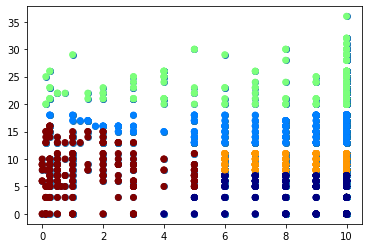

In [5]:
vis_dep = pd.read_csv('dataset/flight-weather.csv', nrows =5000, usecols= ['HOURLYVISIBILITY','HOURLYWindSpeed'])
X = vis_dep.values
plt.scatter(X[:,0], X[:,1])
k=5
y_pred_10 = KMeans(n_clusters = k, verbose = 0, n_jobs = -1, random_state=1).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c = y_pred_10, marker = 'o', cmap = plt.cm.get_cmap("jet",k))
plt.show()

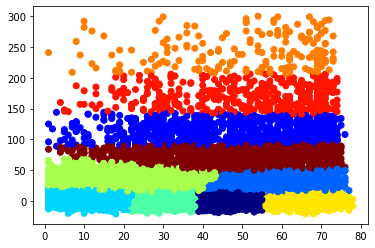

In [6]:
# Temp and dep delay
Temp_dep = pd.read_csv('dataset/flight-weather.csv', usecols= ['HOURLYDewPointTempF','dep_delay'])
X = Temp_dep.drop(Temp_dep[Temp_dep['HOURLYDewPointTempF'] < 1].index)
X = X.drop(X[X['dep_delay'] > 300].index).values
k=10
y_pred = KMeans(n_clusters = k, precompute_distances=True, verbose = 0, n_jobs = -1, random_state=1).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c = y_pred, marker = 'o', cmap = plt.cm.get_cmap("jet",k))
plt.show()

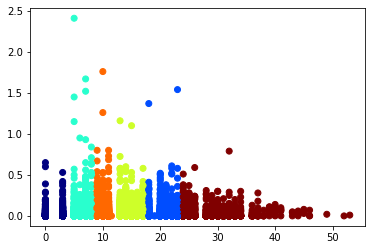

In [7]:
# HOURLYPrecip and HOURLYWindSpeed
pre_wind = pd.read_csv('dataset/jfk_weather_cleaned.csv', usecols= ['HOURLYPrecip', 'HOURLYWindSpeed'])
X = pre_wind.values
k=5

y_pred = KMeans(n_clusters = k+1, precompute_distances=True, verbose = 0, n_jobs = -1, random_state=1).fit_predict(X)
plt.scatter(X[:,0], X[:,1],c = y_pred, marker = 'o', cmap = plt.cm.get_cmap("jet",k+1))
plt.show()

# Target

<function matplotlib.pyplot.show(close=None, block=None)>

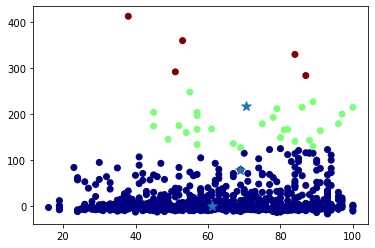

In [8]:
# humidity and pressure
hum_pre = pd.read_csv('dataset/flight-weather.csv', nrows =1000, usecols= ['HOURLYRelativeHumidity','HOURLYStationPressure','dep_delay'])
# X = hum_pre.drop(hum_pre[hum_pre['HOURLYStationPressure'] < 1].index).values
X = hum_pre.values
y = pd.read_csv('dataset/flight-weather.csv', nrows =1000, usecols= ['dep_delay']).values

kmeans = KMeans(n_clusters = 3, verbose = 0, n_jobs = -1, random_state=1)
y_pred = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:,0:1], X[:,2],c = y, marker = 'o', cmap = plt.cm.get_cmap("jet",3))
plt.scatter(centers[:,0:1],centers[:,2],marker="*", s= 100) 
plt.show

# K-means Predict

<function matplotlib.pyplot.show(close=None, block=None)>

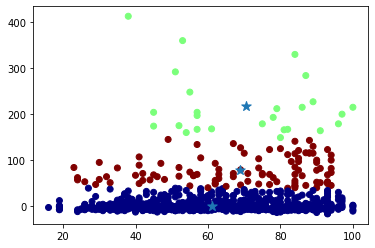

In [9]:
kmeans = KMeans(n_clusters = 3, verbose = 0, n_jobs = -1, random_state=1)
y_pred = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:,0:1], X[:,2],c = y_pred, marker = 'o', cmap = plt.cm.get_cmap("jet", 3))
plt.scatter(centers[:,0:1],centers[:,2],marker="*", s= 100) 
plt.show

### Cross Validation with Bernoulli

In [10]:
from sklearn import metrics
metrics.silhouette_score(X,kmeans.labels_) 

0.6274861581403518

# GMM Predict

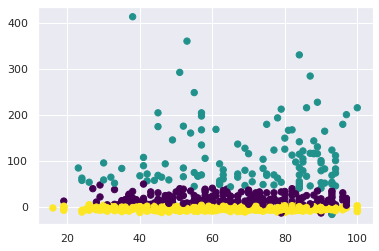

In [11]:
%matplotlib inline
# from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np


hum_pre = pd.read_csv('dataset/flight-weather.csv', nrows =1000, usecols= ['HOURLYRelativeHumidity','HOURLYStationPressure','dep_delay'])
X = hum_pre.values
y = pd.read_csv('dataset/flight-weather.csv', nrows =1000, usecols= ['dep_delay']).values

gmm = GaussianMixture(n_components=3).fit(X)

labels = gmm.predict(X)
plt.scatter(X[:, 0:1], X[:, 2], c=labels, s=40, cmap='viridis')

# Gaussian Mixed Model

In [12]:
### maybe data doesn't fit the Gaussian distribution, so the result not good

metrics.silhouette_score(X,labels)

0.23225329167052325

In [13]:
for k in range(10):
    kmeans = KMeans(n_clusters = k+2, verbose = 0, n_jobs = -1, random_state=1)
    y_pred = kmeans.fit_predict(X)
    print(metrics.silhouette_score(X,kmeans.labels_)) 

0.7506718601107354
0.6274861581403518
0.4725183536335368
0.48560137610352844
0.49151805524286873
0.4168914571553718
0.43228959325795985
0.43758550512562966
0.39314161333579134
0.4023238130265175


# Elbow method

In [14]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 33.505344508467445
2 : 25.0021931184676
3 : 21.900478286863482
4 : 15.85512945389678
5 : 14.623268703180617
6 : 13.566261945903827
7 : 11.6682916540166
8 : 10.759580422902284
9 : 10.208664087645744


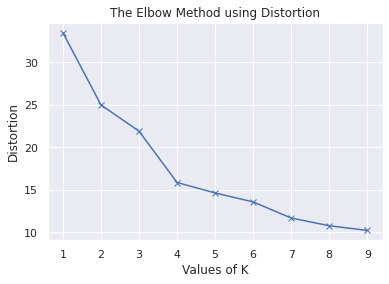

In [15]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

After clustering by Kmeans and GMM algorithm, I can draw the following conclusions

It is better to use clustering algorithm when data fit to Gaussian distribution or normal distribution.

My dataset is linearly distributed, which is more suitable for decision trees or Bayesian classification

###### thanks you https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/